# Cancer Classifaction

In [58]:
## 1. Library Imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import numpy as np

In [59]:
## 2. Data Loading
# Verileri yükleme
labels_df = pd.read_csv('../data/external/labels.csv')
data_df = pd.read_csv('../data/external/data.csv')

# Etiketlerdeki yazım hatasını düzeltme (prosrtate -> prostate)
labels_df['disease_type'] = labels_df['disease_type'].replace('prosrtate cancer', 'prostate cancer')

# İlk birkaç satırı inceleyelim
print("Labels veri seti:")
display(labels_df.head())
print("\nData veri seti:")
display(data_df.head())

Labels veri seti:


,Sample,disease_type
0,s12859,colon cancer
1,s12878,colon cancer
2,s12857,colon cancer
3,s12882,colon cancer
4,s12871,colon cancer



Data veri seti:


,Unnamed: 0,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,...,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Cloacibacillus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Lachnospiraceae.g__Sellimonas,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum
0,s12859,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s12878,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s12857,2,0,484,0,8,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,s12882,4,0,96,0,2,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,s12871,2,0,128,0,16,0,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [60]:
## 3. Veri Hazırlama
# data.csv dosyasına Sample sütununu ekleme
if len(labels_df) == len(data_df):
    data_df['Sample'] = labels_df['Sample']
else:
    raise ValueError("labels.csv ve data.csv satır sayıları eşleşmiyor!")

# Etiketlerle verileri birleştirme
data_df = data_df.merge(labels_df, on='Sample')

# Birleştirilmiş veri setinin ilk birkaç satırını gösterelim
print("Birleştirilmiş veri seti:")
display(data_df.head())


Birleştirilmiş veri seti:


,Unnamed: 0,k__Viruses.f__Phycodnaviridae.g__Prasinovirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus,k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus,k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus,k__Viruses.f__Poxviridae.g__Parapoxvirus,k__Viruses.f__Papillomaviridae.g__Dyolambdapapillomavirus,k__Viruses.o__Mononegavirales.f__Bornaviridae.g__Bornavirus,k__Viruses.f__Bicaudaviridae.g__Bicaudavirus,k__Viruses.o__Picornavirales.f__Picornaviridae.g__Aquamavirus,...,k__Archaea.p__Thaumarchaeota.g__Candidatus_Nitrosotenuis,k__Bacteria.p__Rhodothermaeota.c__Balneolia.o__Balneolales.f__Balneolaceae.g__Gracilimonas,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Thermoproteales.f__Thermoproteaceae.g__Caldivirga,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella,k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermosphaera,k__Bacteria.p__Proteobacteria.c__Betaproteobacteria.o__Neisseriales.f__Chromobacteriaceae.g__Deefgea,k__Bacteria.p__Deferribacteres.c__Deferribacteres.o__Deferribacterales.f__Deferribacteraceae.g__Geovibrio,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Subdoligranulum,Sample,disease_type
0,s12859,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,s12859,colon cancer
1,s12878,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,s12878,colon cancer
2,s12857,2,0,484,0,8,0,0,2,2,...,0,0,0,0,0,0,0,0,s12857,colon cancer
3,s12882,4,0,96,0,2,0,0,2,4,...,0,0,0,0,0,0,0,0,s12882,colon cancer
4,s12871,2,0,128,0,16,0,4,0,4,...,0,0,0,0,0,0,0,0,s12871,colon cancer


In [61]:
## 4. Veri Temizleme ve Dönüştürme
# Sayısal olmayan sütunları kontrol etme
feature_cols = [col for col in data_df.columns if col not in ['Sample', 'disease_type']]
print("Sütun veri türleri:\n", data_df[feature_cols].dtypes)

# Sütunları sayısala dönüştürme (hatalı değerleri NaN yapar)
for col in feature_cols:
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

# NaN değerleri kontrol etme
print("\nNaN değerlerin sayısı:", data_df[feature_cols].isna().sum().sum())

# NaN değerleri 0 ile doldurma (veya başka bir strateji kullanılabilir)
data_df[feature_cols] = data_df[feature_cols].fillna(0)

Sütun veri türleri:
 Unnamed: 0                                                                                                             object
k__Viruses.f__Phycodnaviridae.g__Prasinovirus                                                                           int64
k__Viruses.o__Caudovirales.f__Siphoviridae.g__Sfi1unalikevirus                                                          int64
k__Viruses.o__Herpesvirales.f__Herpesviridae.g__Simplexvirus                                                            int64
k__Viruses.o__Caudovirales.f__Siphoviridae.g__C2likevirus                                                               int64
                                                                                                                        ...  
k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiales_Family_XIII._Incertae_Sedis.g__Casaltella     int64
k__Archaea.p__Crenarchaeota.c__Thermoprotei.o__Desulfurococcales.f__Desulfurococcaceae.g__Thermos

In [62]:
## 5. Veri Normalleştirme
# Sayımları normalleştirme (her örneğin toplam sayısına bölme)
data_df[feature_cols] = data_df[feature_cols].div(data_df[feature_cols].sum(axis=1), axis=0)

# NaN değerleri tekrar kontrol etme ve doldurma (normalizasyon sonrası)
print("Normalleştirme sonrası NaN değerlerin sayısı:", data_df[feature_cols].isna().sum().sum())
data_df[feature_cols] = data_df[feature_cols].fillna(0)

Normalleştirme sonrası NaN değerlerin sayısı: 0


In [63]:
## 6. Yardımcı Fonksiyonlar
# İkili sınıflandırma verilerini hazırlama fonksiyonu
def prepare_data(cancer_type):
    y = (data_df['disease_type'] == cancer_type).astype(int)
    X = data_df[feature_cols]
    return X, y

# Duyarlılık ve özgüllük hesaplama fonksiyonu
def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return sensitivity, specificity

In [64]:
## 7. Model Oluşturma ve Eğitim
# Akciğer ve prostat kanseri için sınıflandırma
cancer_types = ['lung cancer', 'prostate cancer']
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for cancer in cancer_types:
    print(f"\n{cancer} için sınıflandırma")
    X, y = prepare_data(cancer)
    
    # Veri seti dengesi kontrol etme
    print(f"Pozitif örnekler: {sum(y)}, Negatif örnekler: {len(y) - sum(y)}")
    
    # Veriyi bölme
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Eğitim seti boyutu: {len(X_train)}, Test seti boyutu: {len(X_test)}")
    
    for model_name, model in models.items():
        print(f"\n{model_name} modeli eğitiliyor...")
        
        # Modeli eğitme
        model.fit(X_train, y_train)
        
        # Tahmin yapma
        y_pred = model.predict(X_test)
        
        # Metrikleri hesaplama
        sensitivity, specificity = compute_metrics(y_test, y_pred)
        
        print(f"{model_name} - Duyarlılık: {sensitivity:.4f}, Özgüllük: {specificity:.4f}")
        
        results.append({
            'Kanser Türü': cancer,
            'Model': model_name,
            'Duyarlılık': sensitivity,
            'Özgüllük': specificity
        })


lung cancer için sınıflandırma
Pozitif örnekler: 18, Negatif örnekler: 337
Eğitim seti boyutu: 284, Test seti boyutu: 71

Random Forest modeli eğitiliyor...
Random Forest - Duyarlılık: 1.0000, Özgüllük: 1.0000

XGBoost modeli eğitiliyor...
XGBoost - Duyarlılık: 1.0000, Özgüllük: 1.0000

prostate cancer için sınıflandırma
Pozitif örnekler: 121, Negatif örnekler: 234
Eğitim seti boyutu: 284, Test seti boyutu: 71

Random Forest modeli eğitiliyor...
Random Forest - Duyarlılık: 1.0000, Özgüllük: 1.0000

XGBoost modeli eğitiliyor...
XGBoost - Duyarlılık: 0.9600, Özgüllük: 1.0000


,Kanser Türü,Model,Duyarlılık,Özgüllük
0,lung cancer,Random Forest,1.00,1.0
1,lung cancer,XGBoost,1.00,1.0
2,prostate cancer,Random Forest,1.00,1.0
3,prostate cancer,XGBoost,0.96,1.0


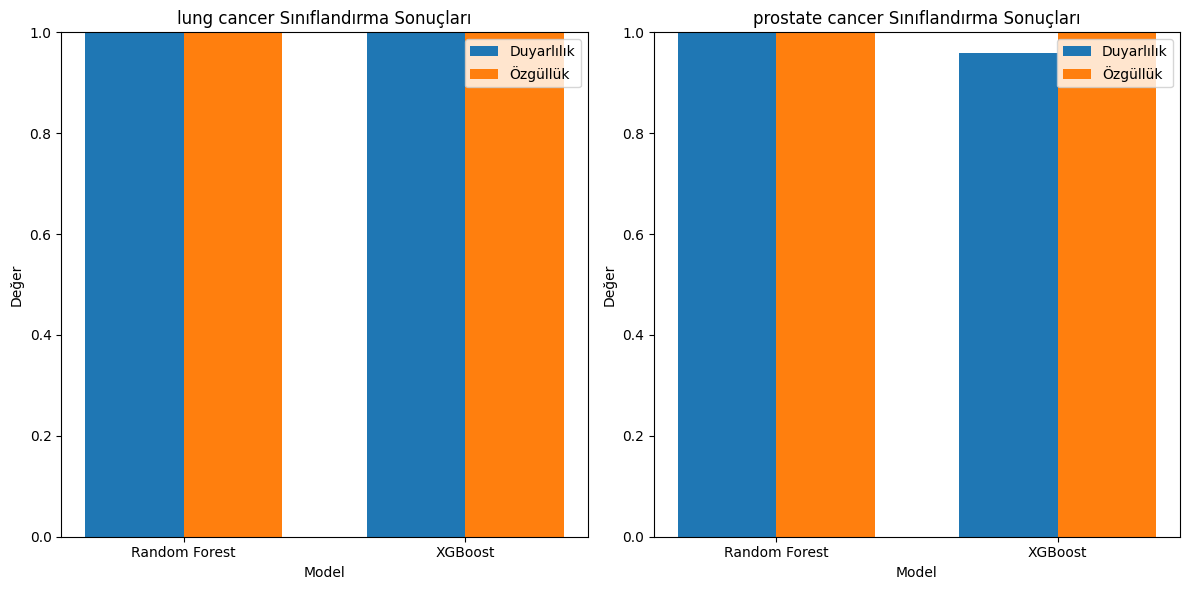

In [65]:
## 8. Sonuçları Kaydetme ve Görselleştirme
# Sonuçları DataFrame olarak oluşturma
results_df = pd.DataFrame(results)
display(results_df)

# Sonuçları görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, cancer in enumerate(cancer_types):
    plt.subplot(1, 2, i+1)
    cancer_results = results_df[results_df['Kanser Türü'] == cancer]
    
    x = range(len(cancer_results))
    width = 0.35
    
    plt.bar([p - width/2 for p in x], cancer_results['Duyarlılık'], width, label='Duyarlılık')
    plt.bar([p + width/2 for p in x], cancer_results['Özgüllük'], width, label='Özgüllük')
    
    plt.xlabel('Model')
    plt.ylabel('Değer')
    plt.title(f'{cancer} Sınıflandırma Sonuçları')
    plt.xticks(x, cancer_results['Model'])
    plt.ylim(0, 1.0)
    plt.legend()

plt.tight_layout()
plt.show()


In [67]:
# Sonuçları ekrana yazdırma
print("\n--- Sınıflandırma Sonuçları ---")
for cancer in cancer_types:
    print(f"\n{cancer} için sonuçlar:")
    cancer_results = results_df[results_df['Kanser Türü'] == cancer]
    for _, row in cancer_results.iterrows():
        print(f"Model: {row['Model']}")
        print(f"  Duyarlılık: {row['Duyarlılık']:.4f}")
        print(f"  Özgüllük: {row['Özgüllük']:.4f}")
        print(f"  Ortalama Performans: {(row['Duyarlılık'] + row['Özgüllük'])/2:.4f}")
        print("")

print("\nSonuçlar 'classification_results.csv' dosyasına kaydedildi")


--- Sınıflandırma Sonuçları ---

lung cancer için sonuçlar:
Model: Random Forest
  Duyarlılık: 1.0000
  Özgüllük: 1.0000
  Ortalama Performans: 1.0000

Model: XGBoost
  Duyarlılık: 1.0000
  Özgüllük: 1.0000
  Ortalama Performans: 1.0000


prostate cancer için sonuçlar:
Model: Random Forest
  Duyarlılık: 1.0000
  Özgüllük: 1.0000
  Ortalama Performans: 1.0000

Model: XGBoost
  Duyarlılık: 0.9600
  Özgüllük: 1.0000
  Ortalama Performans: 0.9800


Sonuçlar 'classification_results.csv' dosyasına kaydedildi


In [66]:
# Sonuçları CSV dosyasına kaydetme
results_df.to_csv('../data/processed/classification_results.csv', index=False)
print("\nSonuçlar 'classification_results.csv' dosyasına kaydedildi")


Sonuçlar 'classification_results.csv' dosyasına kaydedildi
